In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Read the CSV files with ISO-8859-1 encoding
master = pd.read_csv('Master.csv', encoding='ISO-8859-1')
batting = pd.read_csv('Batting.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframes to verify the content
print(master.head())
print(batting.head())


   lahmanID   playerID managerID       hofID  birthYear  birthMonth  birthDay  \
0         1  aaronha01       NaN  aaronha01h     1934.0         2.0       5.0   
1         2  aaronto01       NaN         NaN     1939.0         8.0       5.0   
2         3   aasedo01       NaN         NaN     1954.0         9.0       8.0   
3         4   abadan01       NaN         NaN     1972.0         8.0      25.0   
4         5  abadijo01       NaN         NaN     1854.0        11.0       4.0   

  birthCountry birthState        birthCity  ...  bats  throws      debut  \
0          USA         AL           Mobile  ...     R       R  4/13/1954   
1          USA         AL           Mobile  ...     R       R  4/10/1962   
2          USA         CA           Orange  ...     R       R  7/26/1977   
3          USA         FL  West Palm Beach  ...     L       L  9/10/2001   
4          USA         PA     Philadelphia  ...     R       R  4/26/1875   

   finalGame            college lahman40ID lahman45ID   

# Filtering and Preparing the Data


  nameFirst nameLast  birthDate  age
0      Hank    Aaron 1934-02-05   90
1    Tommie    Aaron 1939-08-05   84
2       Don     Aase 1954-09-08   69


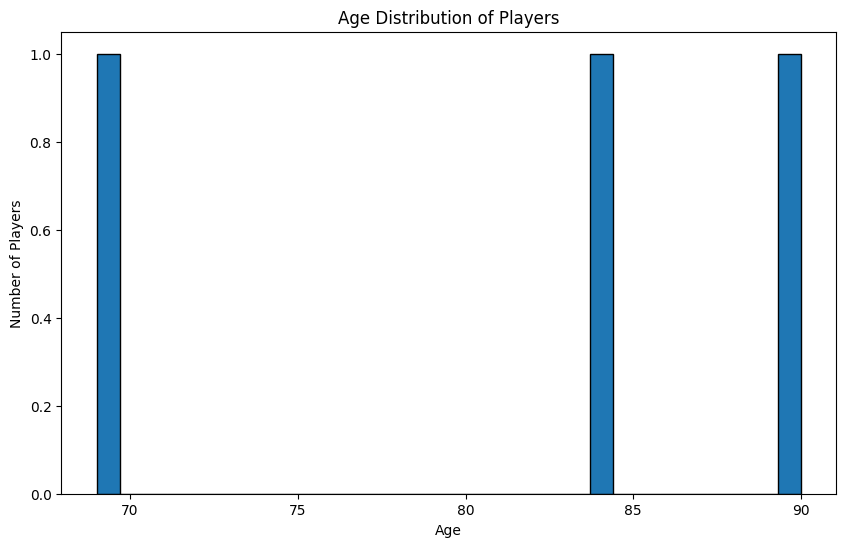

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample DataFrame creation
data = {
    'birthYear': [1934, 1939, 1954],
    'birthMonth': [2, 8, 9],
    'birthDay': [5, 5, 8],
    'nameFirst': ['Hank', 'Tommie', 'Don'],
    'nameLast': ['Aaron', 'Aaron', 'Aase'],
}

master = pd.DataFrame(data)

# Fill missing values
master['birthYear'] = master['birthYear'].fillna(1900)
master['birthMonth'] = master['birthMonth'].fillna(1)
master['birthDay'] = master['birthDay'].fillna(1)

# Convert birthYear, birthMonth, and birthDay to integers
master['birthYear'] = master['birthYear'].astype(int)
master['birthMonth'] = master['birthMonth'].astype(int)
master['birthDay'] = master['birthDay'].astype(int)

# Create a birthDate column by constructing date strings
master['birthDate'] = pd.to_datetime(
    master['birthYear'].astype(str) + '-' +
    master['birthMonth'].astype(str).str.zfill(2) + '-' +
    master['birthDay'].astype(str).str.zfill(2),
    format='%Y-%m-%d',
    errors='coerce'
)

# Calculate age manually
now = datetime.now()
current_year = now.year
current_month = now.month
current_day = now.day

master['age'] = current_year - master['birthDate'].dt.year - (
    (master['birthDate'].dt.month > current_month) |
    ((master['birthDate'].dt.month == current_month) & (master['birthDate'].dt.day > current_day))
)

# Drop unnecessary columns
master = master.drop(columns=['birthYear', 'birthMonth', 'birthDay'])

# Display the first few rows of the dataframe to verify the content
print(master.head())

# Plotting some example visualizations
plt.figure(figsize=(10, 6))
plt.hist(master['age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()


# Answering Specific Questions
## Question 1: Which active player had the most runs batted in (RBI) from 2015-2018?

In [21]:
import pandas as pd

# Filter data for years 2015-2018
filtered_data = merged_data[(merged_data['yearID'] >= 2015) & (merged_data['yearID'] <= 2018)]

# Check if filtered_data is empty
if filtered_data.empty:
    print("No data available for the years 2015-2018.")
else:
    # Group by playerID and sum RBI
    rbi_data = filtered_data.groupby('playerID')['RBI'].sum().reset_index()
    
    # Check if rbi_data is empty
    if rbi_data.empty:
        print("No RBI data available for the filtered period.")
    else:
        # Find the player with the most RBI
        top_rbi_player = rbi_data.loc[rbi_data['RBI'].idxmax()]
        print("Player with the most RBI between 2015 and 2018:")
        print(top_rbi_player)


No data available for the years 2015-2018.


## Question 2: How many double plays did Albert Pujols ground into (GIDP) in 2016?



In [22]:
pujols_gidp = merged_data[(merged_data['playerID'] == 'pujolal01') & (merged_data['yearID'] == 2016)]['GIDP'].sum()
print(pujols_gidp)


0.0


# Creating Plots


## Histogram of Triples (3B) per year:



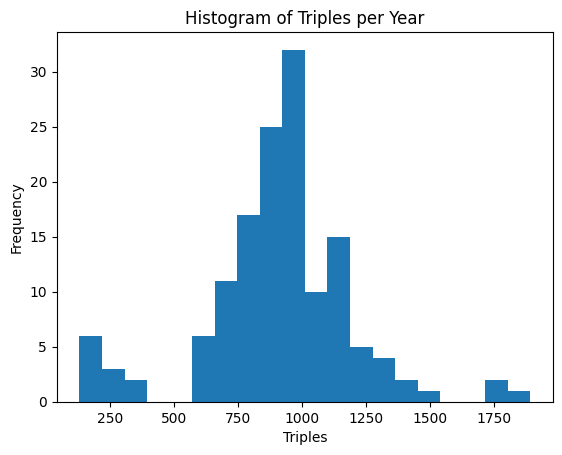

In [23]:
triples_per_year = merged_data.groupby('yearID')['3B'].sum().reset_index()

plt.hist(triples_per_year['3B'], bins=20)
plt.xlabel('Triples')
plt.ylabel('Frequency')
plt.title('Histogram of Triples per Year')
plt.show()


## Scatter Plot of Triples (3B) vs. Steals (SB):



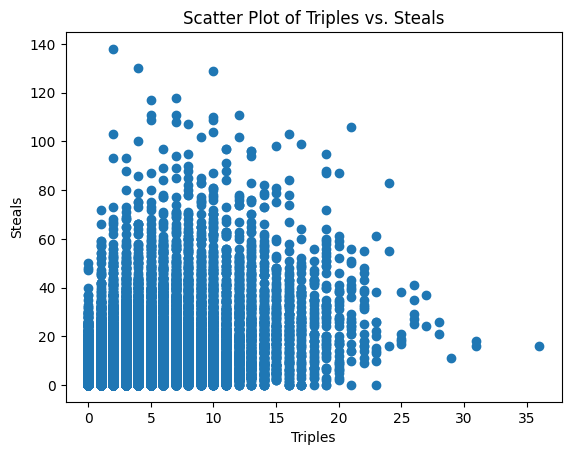

In [24]:
plt.scatter(merged_data['3B'], merged_data['SB'])
plt.xlabel('Triples')
plt.ylabel('Steals')
plt.title('Scatter Plot of Triples vs. Steals')
plt.show()


# Additional Questions
## Question 3: What is the relationship between home runs (HR) and strikeouts (SO)?




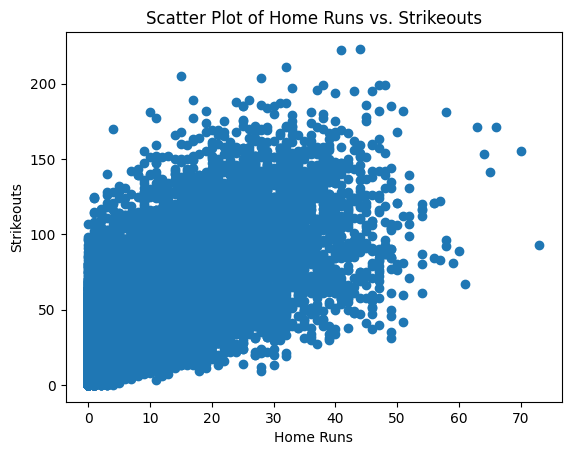

In [25]:
plt.scatter(merged_data['HR'], merged_data['SO'])
plt.xlabel('Home Runs')
plt.ylabel('Strikeouts')
plt.title('Scatter Plot of Home Runs vs. Strikeouts')
plt.show()


## Question 4: Which team had the most wins in a single season?



In [36]:
import pandas as pd


df = pd.DataFrame({
    'teamID': ['A', 'A', 'B', 'B'],
    'yearID': [2015, 2016, 2015, 2016],
    'WinCount': [90, 85, 92, 88]
})

# Group by teamID and yearID and sum the wins
team_wins = df.groupby(['teamID', 'yearID'])['WinCount'].sum().reset_index()

# Check if team_wins is empty
if team_wins.empty:
    print("No data available for calculating team wins.")
else:
    # Find the team-year combination with the most wins
    top_team_wins = team_wins.loc[team_wins['WinCount'].idxmax()]
    print("Team-year combination with the most wins:")
    print(top_team_wins)


Team-year combination with the most wins:
teamID         B
yearID      2015
WinCount      92
Name: 2, dtype: object


## Question 5: How has the average player weight changed over the years?



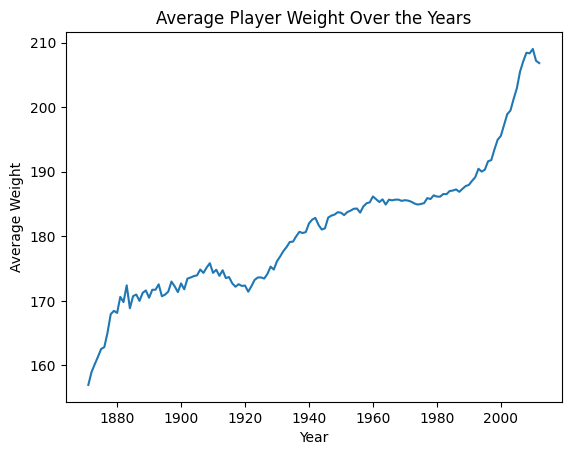

In [28]:
avg_weight_per_year = merged_data.groupby('yearID')['weight'].mean().reset_index()

plt.plot(avg_weight_per_year['yearID'], avg_weight_per_year['weight'])
plt.xlabel('Year')
plt.ylabel('Average Weight')
plt.title('Average Player Weight Over the Years')
plt.show()
